In [1]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import json, codecs
import warnings
warnings.filterwarnings("ignore")

4422102/4422102 [==============================] - 0s 0us/step


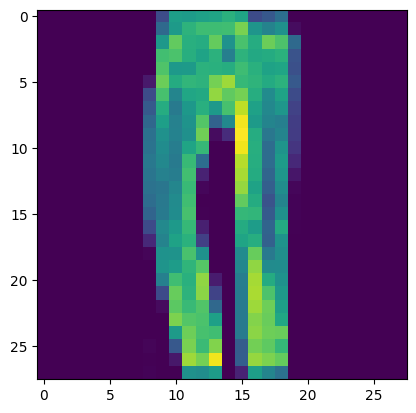

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = x_train.reshape((len(x_train),28*28))
x_test = x_test.reshape((len(x_test),28*28))

plt.imshow(x_train[1500].reshape(28,28))

In [4]:
input_img = Input(shape = (784,))

encoded = Dense(256, activation="relu")(input_img)

encoded = Dense(64, activation="relu")(input_img)

encoded = Dense(16, activation="relu")(encoded)

decoded = Dense(64, activation="relu")(encoded)

encoded = Dense(256, activation="relu")(encoded)

output_img = Dense(784, activation="sigmoid")(decoded)

autoencoder = Model(input_img, output_img)

autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [6]:
hist = autoencoder.fit(x_train,
                       x_train, #noising yaptığımız için
                       epochs=50,
                       batch_size=256,
                       shuffle= True,
                       validation_data= (x_test, x_test))


Epoch 1/50
235/235 [==============================] - 7s 30ms/step - loss: 0.2850 - val_loss: 0.2873
Epoch 2/50
235/235 [==============================] - 6s 27ms/step - loss: 0.2848 - val_loss: 0.2874
Epoch 3/50
235/235 [==============================] - 4s 16ms/step - loss: 0.2847 - val_loss: 0.2870
Epoch 4/50
235/235 [==============================] - 4s 19ms/step - loss: 0.2846 - val_loss: 0.2870
Epoch 5/50
235/235 [==============================] - 3s 14ms/step - loss: 0.2844 - val_loss: 0.2867
Epoch 6/50
235/235 [==============================] - 3s 14ms/step - loss: 0.2843 - val_loss: 0.2868
Epoch 7/50
235/235 [==============================] - 4s 15ms/step - loss: 0.2842 - val_loss: 0.2865
Epoch 8/50
235/235 [==============================] - 4s 15ms/step - loss: 0.2840 - val_loss: 0.2863
Epoch 9/50
235/235 [==============================] - 3s 13ms/step - loss: 0.2839 - val_loss: 0.2865
Epoch 10/50
235/235 [==============================] - 3s 13ms/step - loss: 0.2839 - val_lo

dict_keys(['loss', 'val_loss'])


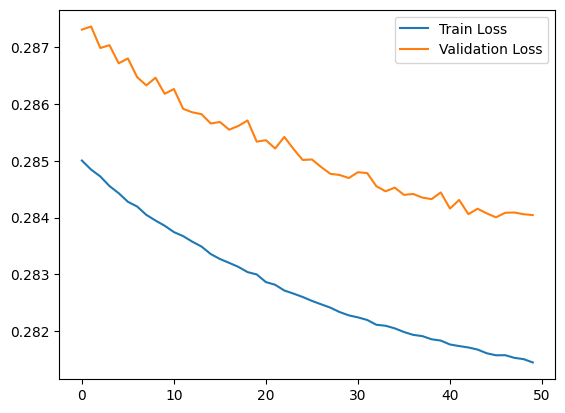

In [7]:
autoencoder.save_weights("autoencoder_model.h5")

print(hist.history.keys())

h=hist.history
plt.plot(h["loss"],label="Train Loss")
plt.plot(h["val_loss"],label="Validation Loss")
plt.legend()
plt.show()

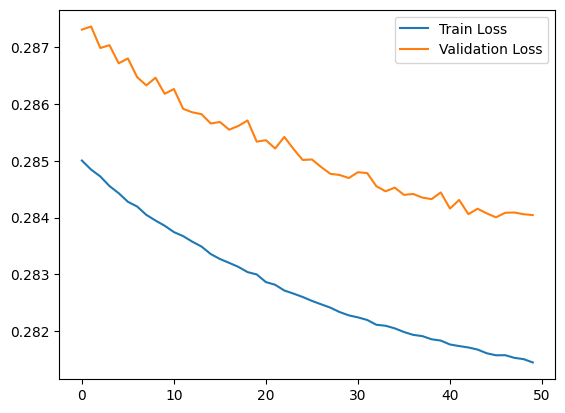

In [8]:
with open("autoencoder_history.json","w") as f:
    json.dump(hist.history,f)

#%% load history

with codecs.open("autoencoder_history.json","r",encoding="utf-8") as f:
    n = json.loads(f.read())

plt.plot(n["loss"],label="Train Loss")
plt.plot(n["val_loss"],label="Validation Loss")
plt.legend()
plt.show()

313/313 [==============================] - 1s 3ms/step


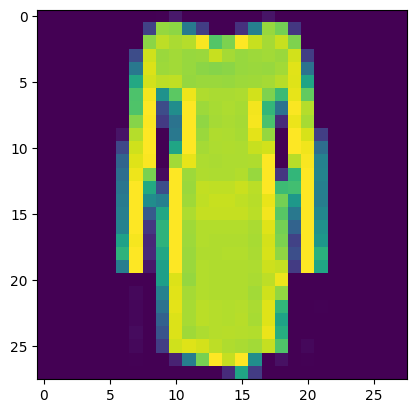

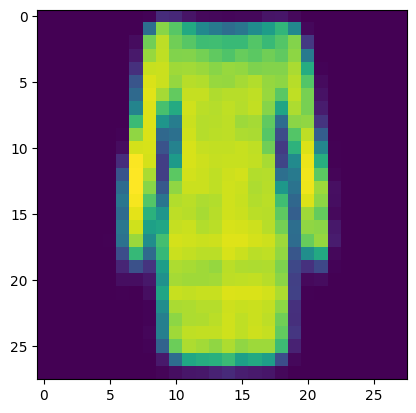

In [9]:
encoder = Model(input_img, output_img)
encoded_img = encoder.predict(x_test)

plt.imshow(x_test[1500].reshape(28,28))
plt.figure()
plt.imshow(encoded_img[1500].reshape(28,28))

313/313 [==============================] - 1s 3ms/step


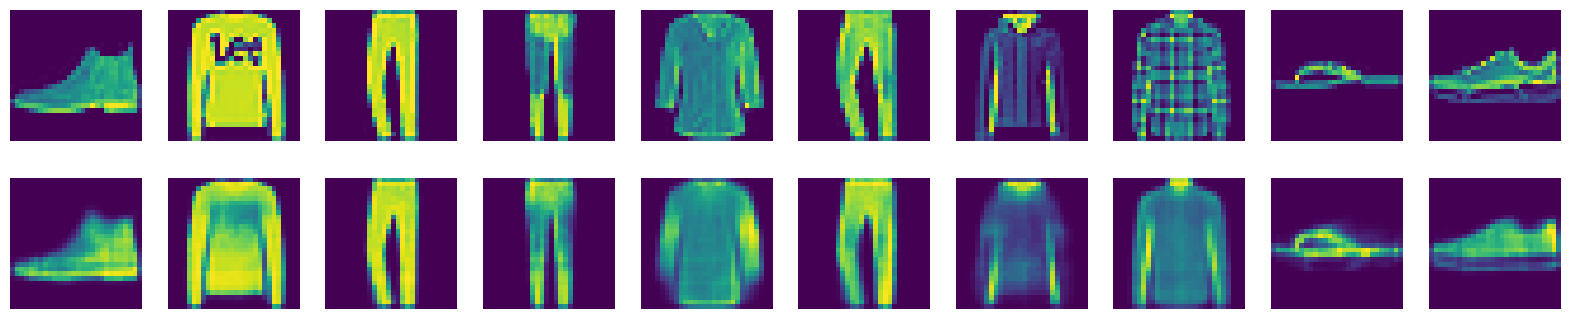

In [11]:
decoded_img = autoencoder.predict(x_test)

m=10
plt.figure(figsize=(20,4))
for i in range(m):

    ax = plt.subplot(2,m,i+1) # satır, kolon, index
    plt.imshow(x_test[i].reshape(28,28))
    plt.axis("off")

    ax = plt.subplot(2,m,i+m+1)
    plt.imshow(decoded_img[i].reshape(28,28))
    plt.axis("off")

plt.show()